In [73]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import * 

In [172]:
X = np.linspace(0, 1, 20)
Y = np.linspace(0, 1, 20) 
yy, xx = np.meshgrid(Y, X)

In [179]:
C = np.arctan((yy - 0.5) / 0.1) # само скалярное значение
C.shape

(20, 20)

In [180]:
x, y = sympy.symbols('x y')
psi = sin(pi * 2 *x) * sin(pi * y)
u = Derivative(psi, y).doit()
v = -Derivative(psi, x).doit()
psi

sin(2*pi*x)*sin(pi*y)

In [181]:
u

pi*sin(2*pi*x)*cos(pi*y)

In [182]:
v

-2*pi*sin(pi*y)*cos(2*pi*x)

In [183]:
uu = np.zeros((len(X), len(Y)))
vv = np.zeros((len(X), len(Y)))
for i in range(len(X)):
    for j in range(len(Y)):
        uu[i, j] = u.subs({x:X[i], y:Y[j]})
        vv[i, j] = v.subs({x:X[i], y:Y[j]})

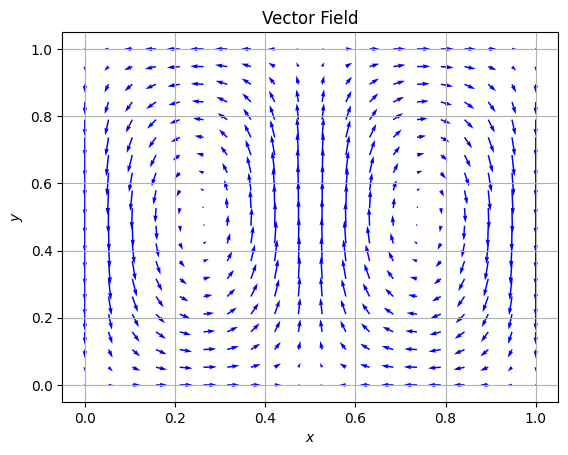

In [188]:
plt.quiver(xx, yy, uu, vv, color='b') 
plt.title('Vector Field') 
  
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid() 
plt.show()

## Численное решение

In [203]:
from scipy.integrate import odeint

In [246]:
nt = 100
t = np.linspace(0, 1, nt + 1)

In [247]:
def dx(X, Y):
    return u.subs({x:X, y:Y})

def dy(X, Y):
    return v.subs({x:X, y:Y})

def right(t, xy):
    return np.array([
        dx(xy[0], xy[1]),
        dy(xy[0], xy[1])
    ])

def model(xy, t):
    dxdt = dx(xy[0], xy[1])
    dydt = dy(xy[0], xy[1])
    return [dxdt, dydt]

def C0(x, y):
    return np.arctan((yy - 0.5) / 0.1)

In [248]:
def calc(xy0, t):
    return odeint(model, xy0, t)

In [266]:
n = 2000
points = np.random.rand(n, 2)
cs = C0(points[:, 0], points[:, 1])

ValueError: Initial condition y0 must be one-dimensional.

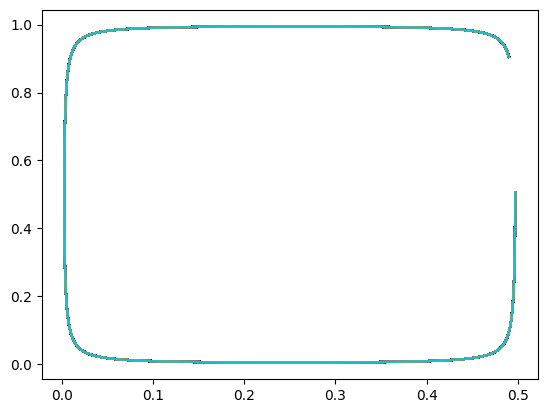

In [264]:
for i in range(len(points)):
    plt.plot(c[:, 0], c[:, 1])